Dieses Notebook betrachtet simultane Impuls- und Energieerhaltung anhand von einem 3-Kugel Newton Cradle.

Die Impulse der 3 Kugeln (1 - 2 - 3) sind
$\vec{p}_1$, $\vec{p}_2$, und  $\vec{p}_3$. 
Die verwendeten Gleichungen sind:

$$|\vec{p}_j| = \sqrt{2m_jE_j}$$

und 
$$E_j = \frac{\vec{p}_j\cdot\vec{p}_j}{2m_j}= \frac{p_j^2}{2m_j}$$

Gesamtimpuls = 2.0 Ns, Gesamtenergie = 1.0 W


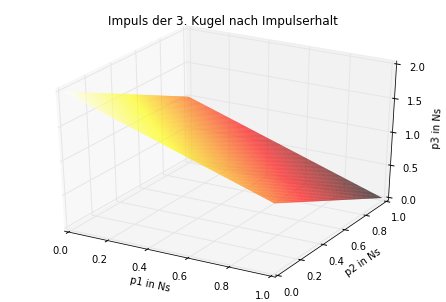

In [2]:
from math import *
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

u1 = 1.0    # Geschwindigkeit der 1. Kugel in m/s (vor dem Stoß)
u2 = 1.0    # Geschwindigkeit der 2. Kugel in m/s (vor dem Stoß)
u3 = 0.0    # Geschwindigkeit der 3. Kugel in m/s (vor dem Stoß)
m1 = 1.0    # Masse der 1. Kugel in kg
m2 = 1.0    # Masse der 2. Kugel in kg
m3 = 1.0    # Masse der 3. Kugel in kg
r  = 1.0    # Effizienz der Energieübertragung während des Stoßes
pGesamt =  m1*u1+m2*u2+m3*u3              # Der Gesamtimpuls
EGesamt = (m1*u1**2+m2*u2**2+m3*u3**2)/2  # Gesamtenergie
print("Gesamtimpuls =",pGesamt,"Ns, Gesamtenergie =",EGesamt,"W")

# Im folgenden werden wir Lösungen für den Impuls der 3 Kugeln nach dem Stoß
# graphisch darstellen.  
# Dafür erstellen wir ein Raster für alle möglichen Kombinationen von Impulsen
# der 1. und 2. Kugel
p1 = linspace(0,1,80)         # Impuls der 1. Kugel
p2 = linspace(0,1,80)         # Impuls der 2. Kugel 
p1,p2 = meshgrid(p1,p2)       # 2D Arrays für p1 und p2
p3a = pGesamt-p1-p2           # Impuls der 3. Kugel ist der Rest zum Gesamtimpuls

fig = figure()
ax = Axes3D(fig)
ax.plot_surface(p1,p2,p3a, rstride=1, cstride=1, cmap='hot',alpha=0.8, shade='flat',linewidth=0)
ax.set_xlabel('p1 in Ns')
ax.set_ylabel('p2 in Ns')
ax.set_zlabel('p3 in Ns')
title('Impuls der 3. Kugel nach Impulserhalt')

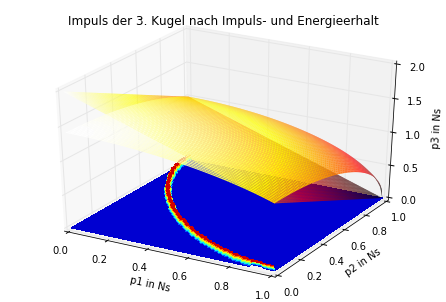

In [5]:
E1 = p1**2/(2*m1)             # Energie der 1. Kugel
E2 = p2**2/(2*m2)             # Energie der 2. Kugel
E3 = r*EGesamt-E1-E2          # Energie der 3. Kugel
E3.flat[(E3.flat<0)] = 0  # Die Energie darf nicht kleiner als 0 sein 
p3b = sqrt(2*m3*E3)           # Impuls der 3. Kugel laut Energieerhaltungssatz

# Darstellung im 3D Plot
fig = figure()
ax = Axes3D(fig)
ax.plot_surface(p1,p2,p3a, rstride=1, cstride=1, cmap='hot',alpha=0.8, shade='flat',linewidth=0)
ax.plot_surface(p1,p2,p3b, rstride=1, cstride=1, cmap='hot',alpha=0.95, shade='flat',linewidth=0)

# Berechnung und Darstellung der Schnittkurve der beiden Impuls-Lösungen für die 3. Kugel
# Nur diejenigen (p1,p2 Paare), wo die beiden Lösungen für Impulserhaltung und Energieerhaltung 
# sich schneiden, sind überhaupt physikalisch möglich.
p3d = 0.1*(abs(p3a-p3b) < 0.01)
p3d.flat[(E3.flat==0)] = 0 
ax.contourf(p1,p2,p3d)
ax.set_xlabel('p1 in Ns')
ax.set_ylabel('p2 in Ns')
ax.set_zlabel('p3 in Ns')
title('Impuls der 3. Kugel nach Impuls- und Energieerhalt')

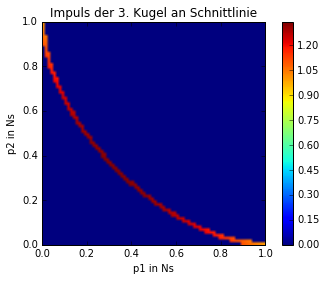

In [7]:
# Bisher haben wir nur festgestellt, ob beide Impulse gleich sind
# Jetzt müssen wir an diese Stellen auch den tatsächlichen Impuls kopieren
p3d.flat[(p3d.flat>0)] = p3a.flat[(p3d.flat>0)]

# Stelle den Impuls der 3. Kugel graphisch dar
imshow(p3d,origin='lower', extent=[0,1,0,1])
colorbar()
xlabel('p1 in Ns')
ylabel('p2 in Ns')
title('Impuls der 3. Kugel an Schnittlinie')

Jetzt müssen wir diejenigen Möglichkeiten herausfiltern, für die die Kugeln sich nicht gegenseitig überholen.

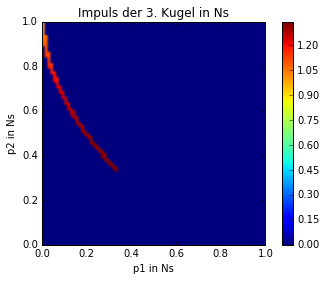

In [8]:
# Die 1. Kugel darf nicht schneller als die 2. sein:
p3d.flat[((p1/m1).flat>(p2/m2).flat)] = 0
# Die 2. Kugel darf nicht schneller als die 3. sein:
p3d.flat[((p2/m2).flat>(p3d/m3).flat)] = 0
imshow(p3d,origin='lower', extent=[0,1,0,1])

colorbar()
xlabel('p1 in Ns')
ylabel('p2 in Ns')
title('Impuls der 3. Kugel in Ns')

Die Lösung des Problems ist diejenige, bei der die 3. Kugel die geringste Geschwindigkeit (d.h. auch den geringsten Impuls hat)

In [9]:
p3min = p3d.flat[(p3d.flat>0)].min()
p1min = p1.flat[(p3d.flat == p3min)]
p2min = p2.flat[(p3d.flat == p3min)]
print("Loesung: p1 =",p1min[0],"Ns, p2 =",p2min[0],"Ns, p3 =",p3min,"Ns")

Loesung: p1 = 0.0 Ns, p2 = 1.0 Ns, p3 = 1.0 Ns
